### 3. zadatak (8 poena)

U datoteci `corona_tweets.csv` se nalaze tvitovi na temu korona virusa prikupljeni sa različitih lokacija. Svakom tvitu je pridruženo obeležje sentimenta, od jako negativnog do jako pozitivnog. Potrebno je generisati 2D prikaz skupa zbog uvida u strukturu skupa i dalje tekstualne obrade.  

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn import feature_extraction
from sklearn import decomposition

a) Učitati tvitove koji se nalaze u datoteci `corona_tweets`, a potom izdvojiti kolone koje se odnose na lokaciju (`Location`), sadržaj tvita (`OriginalTweet`) i sentiment (`Sentiment`). 

In [3]:
tweets = pd.read_csv('corona_tweets.csv')

In [4]:
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
tweets.shape

(3798, 6)

In [6]:
tweets = tweets[['Location', 'OriginalTweet', 'Sentiment']]

b) Izdvojiti tvitove koji se odnose na Ameriku i London - njima odgovaraju lokacije `United States` i `London, England`.

In [7]:
tweets['Location'].value_counts()

United States                                                75
London, England                                              48
Washington, DC                                               38
New York, NY                                                 34
Los Angeles, CA                                              33
                                                             ..
Killing animals for greed/sport is a mental health issue!     1
San Francisco, California                                     1
Soon, Republic of Australia                                   1
Seattle, Washington USA                                       1
Lives in a kakistocracy/Éire                                  1
Name: Location, Length: 1717, dtype: int64

In [8]:
data = tweets[(tweets['Location']=='United States') | (tweets['Location']=='London, England')]

In [9]:
data.shape

(123, 3)

c) Prikazati grafikonom sa stubićima učestalost tvitova po sentimentu. 

In [10]:
sentiment_frequency = data['Sentiment'].value_counts()

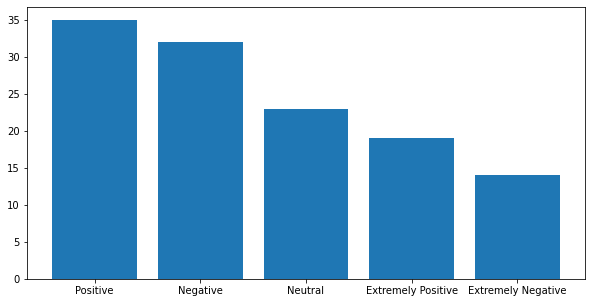

In [11]:
plt.figure(figsize=(10, 5))
plt.bar(sentiment_frequency.index, sentiment_frequency.values)
plt.show()

d) Kreirati TfIdVectorizer tako da eliminiše stop reči tipične za engleski jezik i uzima u obzir reči sa barem 4 pojavljivanja. Koliko reči će biti zadržano?

In [12]:
vectorizer = feature_extraction.text.TfidfVectorizer(min_df=4, stop_words='english')

In [13]:
vectorizer.fit(data['OriginalTweet'])

TfidfVectorizer(min_df=4, stop_words='english')

In [14]:
len(vectorizer.get_feature_names())

87

In [15]:
vectorizer.get_feature_names()

['19',
 'able',
 'amazon',
 'amp',
 'asking',
 'buy',
 'buying',
 'check',
 'china',
 'consumer',
 'coronaoutbreak',
 'coronapocalypse',
 'coronavirus',
 'coronaviruspandemic',
 'coronavirususa',
 'covid',
 'covid19',
 'covid2019',
 'covid_19',
 'crazy',
 'delivery',
 'demand',
 'does',
 'doing',
 'don',
 'elderly',
 'family',
 'flu',
 'food',
 'free',
 'gel',
 'gets',
 'going',
 'grocery',
 'hand',
 'help',
 'high',
 'home',
 'https',
 'items',
 'just',
 'like',
 'll',
 'local',
 'look',
 'money',
 'need',
 'non',
 'online',
 'pandemic',
 'panic',
 'panicbuying',
 'paper',
 'pasta',
 'people',
 'piling',
 'prices',
 'protection',
 'realdonaldtrump',
 'retail',
 'run',
 'sainsburys',
 'sanitizer',
 'seen',
 'self',
 'selling',
 'shelves',
 'shop',
 'shopping',
 'sick',
 'stock',
 'stockpiling',
 'store',
 'stores',
 'supermarket',
 'supplies',
 'sure',
 'think',
 'time',
 'today',
 'toilet',
 'use',
 've',
 'wash',
 'way',
 'went',
 'work']

e) Koristeći kreirani vektorizator, pripremiti tviter porukice. 

In [16]:
dataset_vectorized = vectorizer.transform(data['OriginalTweet'])

In [17]:
dataset_vectorized.shape

(123, 87)

f) Koristeći PCA analizu izvršiti redukciju pripremljenih tvitova na dve dimenzije. Koji udeo varijanse je zadržan ovom transformacijom?

In [18]:
pca = decomposition.PCA(2)

In [19]:
dataset_pca = pca.fit_transform(dataset_vectorized.toarray())

In [20]:
dataset_pca.shape

(123, 2)

In [21]:
np.sum(pca.explained_variance_ratio_)

0.11578544916873165

g) Pridružiti boje labelama sentimenata prema zadatoj mapi, a zatim prikazati 2D grafik tvitova po sentimentima.

In [22]:
sentiment_to_color = {
    'Positive': 'yellow', 
    'Extremely Negative': 'red', 
    'Neutral': 'blue', 
    'Negative': 'green', 
    'Extremely Positive': 'orange'
}

In [23]:
colors = data['Sentiment'].map(sentiment_to_color)

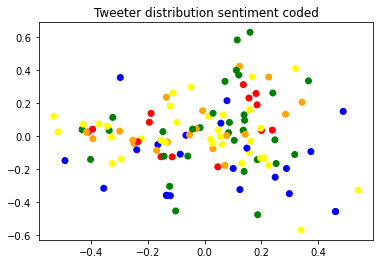

In [24]:
plt.title('Tweeter distribution sentiment coded')
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=colors)
plt.show()

h) Koliki treba da bude broj komponenti PCA analize da bi se zadržalo 90% varijanse polaznog skupa tvitova?

In [25]:
pca = decomposition.PCA(n_components=0.9)

In [26]:
pca.fit(dataset_vectorized.toarray())

PCA(n_components=0.9)

In [27]:
number_of_components = pca.components_.shape[0]

In [28]:
number_of_components

45